# Day 13. Task 03
# Мультиклассовая классификация. One-hot encoding. Случайный лес

## 0. Импорты

In [376]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

## 1. Препроцессинг

**1. Прочитайте файл, расположенный в `datasets/checker_submits.csv`.**

In [330]:
df = pd.read_csv('../data/checker_submits.csv', parse_dates=['timestamp'])
df

,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104
...,...,...,...,...
1681,user_19,laba06s,9,2020-05-21 20:01:48.959966
1682,user_1,laba06s,6,2020-05-21 20:18:54.487900
1683,user_1,laba06s,7,2020-05-21 20:19:06.872761
1684,user_1,laba06s,8,2020-05-21 20:22:41.877806


**2. Создайте датафрейм `df` со столбцами: `uid`, `labname`, `numTrials`, `hour`, `dayofweek`, где `hour` и `dayofweek` (`0` – пн, `6` – вс) получены из `timestamp`. Вы будете пробовать прогнозировать день недели, основываясь на том, какой пользователь в какое время сделал какой по счету коммит какой лабораторной работы.**

In [331]:
df['hour'] = df.timestamp.dt.hour
df['dayofweek'] = df.timestamp.dt.dayofweek
df.drop(columns='timestamp', inplace=True)
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


**3. Используя `OneHotEncoder()` трансформируйте ваши категориальные признаки, удалив при этом изначальные столбцы.**

- [sklearn.preprocessing.OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

- [Категориальное кодирование с использованием Label-Encoding и One-Hot-Encoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd)

- [6.2. Извлечение элементов](https://scikit-learn.org/stable/modules/feature_extraction.html)

- [pandas.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

- [Кодирование меток в нескольких столбцах в scikit-learn](https://overcoder.net/q/42045/кодирование-меток-в-нескольких-столбцах-в-scikit-learn)

In [332]:
from sklearn.preprocessing import OneHotEncoder

In [333]:
ohe = OneHotEncoder()
ohe_fit = ohe.fit_transform(df[['uid', 'labname']]).toarray().astype(int)
ohe_fit

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0]])

In [334]:
ohe_df = pd.DataFrame(ohe_fit, columns=list(ohe.categories_[0]) + list(ohe.categories_[1]))
ohe_df

,user_0,user_1,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,...,lab02,lab03,lab03s,lab05s,laba04,laba04s,laba05,laba06,laba06s,project1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [335]:
df = pd.concat([df.drop(columns=['uid','labname']),
                ohe_df], axis=1)
df

,numTrials,hour,dayofweek,user_0,user_1,user_10,user_11,user_12,user_13,user_14,...,lab02,lab03,lab03s,lab05s,laba04,laba04s,laba05,laba06,laba06s,project1
0,1,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,6,20,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,7,20,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,8,20,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**4. Воспользуйтесь `StandardScaler()`, чтобы стандартизировать ваши численные признаки.**

In [336]:
from sklearn.preprocessing import StandardScaler

In [337]:
df[['numTrials', 'hour']] = StandardScaler().fit_transform(df[['numTrials', 'hour']])
df

,numTrials,hour,dayofweek,user_0,user_1,user_10,user_11,user_12,user_13,user_14,...,lab02,lab03,lab03s,lab05s,laba04,laba04s,laba05,laba06,laba06s,project1
0,-0.788667,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.756764,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.724861,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.692958,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.661055,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,-0.629151,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,-0.597248,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,-0.565345,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**5. Сохраните этот датафрейм в файл `dayofweek.csv`.**


In [338]:
df.to_csv('../data/dayofweek.csv', index=False)

**6. Прежде чем пробовать обучать разные алгоритмы, посчитайте accuracy для наивного прогноза – такого, где все предсказания есть самый популярный класс.**

In [339]:
df['dayofweek'].value_counts().max() /df.shape[0]

0.23487544483985764

## 2. Алгоритмы

### a. Логрегрессия

**1. Обучите логистическую регрессию. Для baseline-модели используйте `random_state=21`, `fit_intercept=False`, `solver='liblinear'`.**

In [340]:
from sklearn.linear_model import LogisticRegression

In [341]:
X = df.drop(columns='dayofweek')
y = df.dayofweek

In [342]:
X

,numTrials,hour,user_0,user_1,user_10,user_11,user_12,user_13,user_14,user_15,...,lab02,lab03,lab03s,lab05s,laba04,laba04s,laba05,laba06,laba06s,project1
0,-0.788667,-2.562352,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.756764,-2.562352,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.724861,-2.562352,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.692958,-2.562352,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.661055,-2.562352,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,-0.629151,0.945382,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,-0.597248,0.945382,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,-0.565345,0.945382,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [343]:
y

0       4
1       4
2       4
3       4
4       4
       ..
1681    3
1682    3
1683    3
1684    3
1685    3
Name: dayofweek, Length: 1686, dtype: int64

In [344]:
logreg = LogisticRegression(random_state=21, 
                            fit_intercept=False, 
                            solver='liblinear').fit(X, y)

- [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**2. Посчитайте accuracy.**

In [345]:
logreg.score(X, y)

0.6215895610913404

**3. Напишите функцию, которая нарисует график (`barh`) и выведет на нем n наиболее важных признаков,
используя коэффициенты обученных моделей и названия признаков.**


- [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

- [Python abs()](https://www.programiz.com/python-programming/methods/built-in/abs)

- [pandas.DataFrame.sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

- [Учебник Pyplot ](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)

In [346]:
def ɡraf_barh(model, n):
    coef = pd.DataFrame(model.coef_, columns=model.feature_names_in_) \
                        .abs() \
                        .sum() \
                        .sort_values(ascending=False)
    coef[0:n].plot.barh(figsize= (15, 8))
    plt.title(f'{n} наиболее важных признаков', fontsize=15)
    plt.show()

**4. Воспользуйтесь функцией и нарисуйте для baseline-модели топ-10 наиболее важных признаков (абсолютные значения коэффициентов).**

**5. Помните, что вы работаете с мультиклассовой классификацией, и `coef_` вернет вам матрицу. Чтобы посчитать важность (importance) для конкретного признака вам нужно будет просуммировать отдельные коэффициенты для всех значений целевой переменной.**

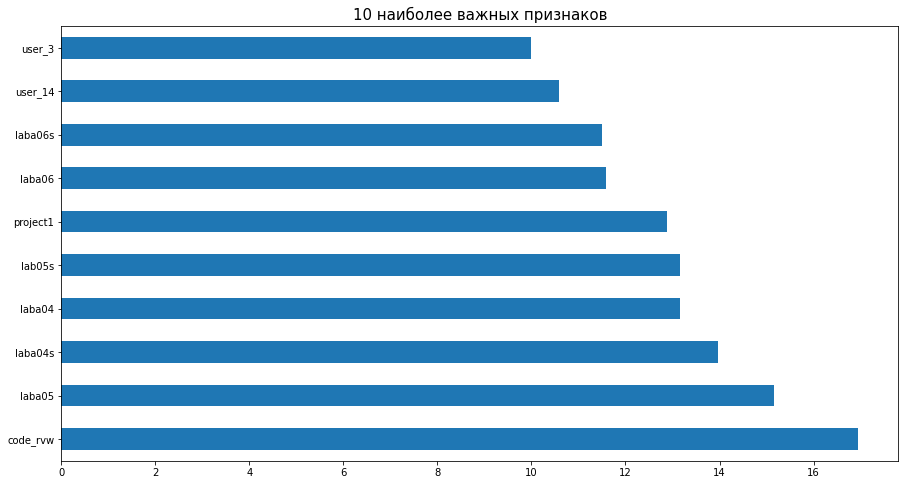

In [347]:
ɡraf_barh(logreg, 10)

### b. SVC

- [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

**1. Обучите модель `SVC`. Для baseline-модели воспользуйтесь параметрами `kernel='linear'`, `probability=True`, `random_state=21`.**

In [348]:
from sklearn.svm import SVC

In [349]:
svc = SVC(kernel='linear', probability=True, random_state=21).fit(X, y)

In [350]:
svc.score(X, y)

0.702846975088968

**2. Попробуйте разные виды кернелов, посчитайте для них accuracy.**

In [351]:
svc_rbf = SVC(kernel='rbf', probability=True, random_state=21).fit(X, y)
svc_rbf.score(X, y)

0.8558718861209964

In [352]:
svc_poly = SVC(kernel='poly', probability=True, random_state=21).fit(X, y)
svc_poly.score(X, y)

0.8594306049822064

In [353]:
svc_sigmoid = SVC(kernel='sigmoid', probability=True, random_state=21).fit(X, y)
svc_sigmoid.score(X, y)

0.3997627520759193

**3. Нарисуйте график (`barh`) с топ-10 наиболее важными признаками (абсолютное значение коэффициентов) для baseline-модели с линейным кернелом.**

По умолчанию, SVC использует “one vs one” стратегию классификации. Это означает, что `coef_` тоже вернет матрицу. Чтобы посчитать важность (importance) для конкретного признака вам нужно будет воспользоваться другой стратегией – [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) и просуммировать отдельные коэффициенты для всех значений целевой переменной.

In [354]:
from sklearn.multiclass import OneVsRestClassifier

In [355]:
orc = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21)).fit(X, y)

In [356]:
orc_coef = orc.estimators_[0].coef_
for i in range(1,7):
    orc_coef = np.concatenate((orc_coef, orc.estimators_[1].coef_))
#orc_coef 

In [357]:
orc_coef = pd.DataFrame(orc_coef, columns=orc.feature_names_in_) \
                        .abs() \
                        .sum() \
                        .sort_values(ascending=False)
#orc_coef

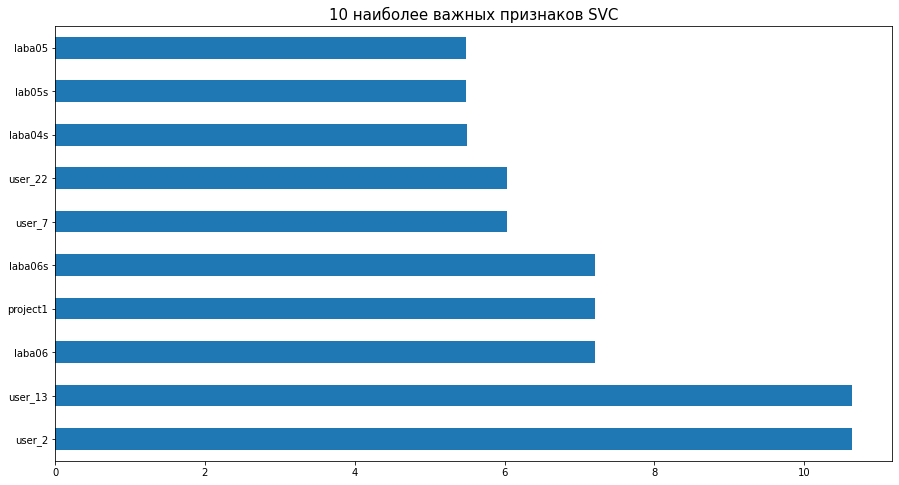

In [358]:
orc_coef[0:10].plot.barh(figsize= (15, 8))
plt.title('10 наиболее важных признаков SVC', fontsize=15)
plt.show()

### c. Дерево классификаций

- [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

**1. Обучите `DecisionTreeClassifier`. Для baseline-модели воспользуйтесь следующими параметрами: `max_depth=4`, `random_state=21`.**

In [359]:
from sklearn.tree import DecisionTreeClassifier

In [360]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=21).fit(X,y)

In [361]:
dtc.score(X, y)

0.5516014234875445

**2. Попробуйте разные значения `max_depth`. Посчитайте accuracy для этих вариантов.**

In [362]:
dtc_3 = DecisionTreeClassifier(max_depth=3, random_state=21).fit(X,y)
dtc_3.score(X, y)

0.48991696322657174

In [363]:
dtc_5 = DecisionTreeClassifier(max_depth=5, random_state=21).fit(X,y)
dtc_5.score(X, y)

0.6109134045077106

In [364]:
dtc_8 = DecisionTreeClassifier(max_depth=8, random_state=21).fit(X,y)
dtc_8.score(X, y)

0.7502965599051008

**3. Нарисуйте график (barh) с топ-10 наиболее важными признаками (абсолютное значение коэффициентов) для baseline-модели.**

In [365]:
dtc_coef = pd.Series(dtc.feature_importances_, index=dtc.feature_names_in_) \
                        .sort_values(ascending=False)
#dtc_coef

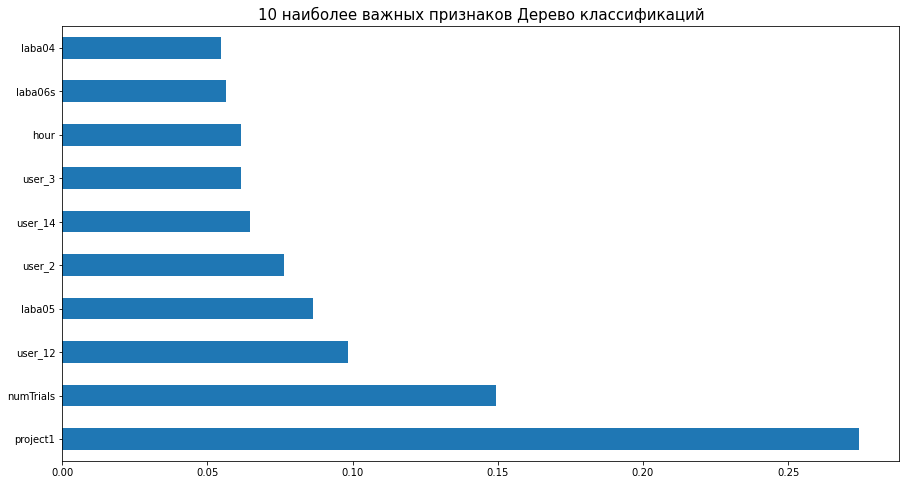

In [366]:
dtc_coef[0:10].plot.barh(figsize= (15, 8))
plt.title('10 наиболее важных признаков Дерево классификаций', fontsize=15)
plt.show()

### d. Случайный лес

- [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

В реальной жизни леса состоят из деревьев. То же самое, как вы знаете, работает и в машинном обучении. Случайный лес – это множество отдельных деревьев классификации.

**1. Обучите `RandomForestClassifier`. Для baseline-модели воспользуйтесь следующими параметрами: `n_estimators=100`, `max_depth = 25`, `random_state=21`.**

In [367]:
 from sklearn.ensemble import RandomForestClassifier

In [368]:
rfc = RandomForestClassifier(n_estimators=100, max_depth = 25, random_state=21).fit(X, y)

In [369]:
rfc.score(X, y)

1.0

**2. Попробуйте разные значения `max_depth` и `n_estimators`. Посчитайте accuracy для этих вариантов.**

In [370]:
rfc_10_20 = RandomForestClassifier(n_estimators=10, max_depth = 20, random_state=21).fit(X, y)
rfc_10_20.score(X, y)

0.9839857651245552

In [371]:
rfc_120_50 = RandomForestClassifier(n_estimators=120, max_depth = 50, random_state=21).fit(X, y)
rfc_120_50.score(X, y)

1.0

In [372]:
rfc_50_5 = RandomForestClassifier(n_estimators=50, max_depth = 5, random_state=21).fit(X, y)
rfc_50_5.score(X, y)

0.5848161328588375

**3. Нарисуйте график (barh) с топ-10 наиболее важными признаками (абсолютное значение коэффициентов) для baseline-модели.**

In [373]:
rfc_coef = pd.Series(rfc.feature_importances_, index=rfc.feature_names_in_) \
                        .sort_values(ascending=False)
#rfc_coef

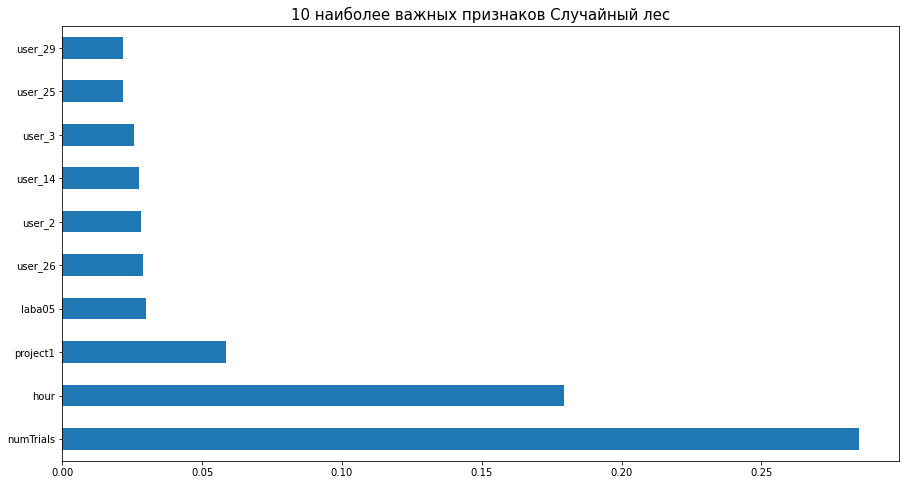

In [374]:
rfc_coef[0:10].plot.barh(figsize= (15, 8))
plt.title('10 наиболее важных признаков Случайный лес', fontsize=15)
plt.show()